In [ ]:
from torchvision import transforms
from torchvision.datasets import MNIST

train_data = MNIST('mnist_train', train=True, transform=transforms.ToTensor(), download=True)
test_data = MNIST('mnist_test', train=False, transform=transforms.ToTensor(), download=True)
print("Train data shape: {0}".format(train_data.data.shape))

In [ ]:
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import DataLoader
from network import CharacterClassifier
from tqdm import tqdm

input_dim = (1, 28, 28)
hidden_layers = [50, 100, 500]
output_dim = 10

train_loader = DataLoader(train_data, batch_size=16, shuffle=True)
test_loader = DataLoader(test_data, batch_size=16, shuffle=False)

model = CharacterClassifier(input_dim, hidden_layers, output_dim)
model.train()

epochs = 5
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
criterion = nn.CrossEntropyLoss()

for epoch in range(epochs):
        print("Epoch {0}".format(epoch))
        for step, [x_train, y_train] in enumerate(tqdm(train_loader)):
            optimizer.zero_grad()
            train_pred = model(x_train)
            loss = criterion(train_pred, y_train)
            loss.backward()
            optimizer.step()
            if step % 300 == 0:
                print('Loss: {}'.format(loss))
            torch.save(model.state_dict(), 'cc{}.ckpt'.format(step))                
model.eval()
accuracies = []
for idx, [x_test, y_test] in enumerate(tqdm(test_loader, desc='Test')):
    test_pred = model(x_test)
    accuracy = 100 * torch.mean((torch.argmax(test_pred, dim=1) == y_test).float())
    accuracies.append(accuracy)
print("Accuracy: {0}".format(np.mean(accuracies)))

In [ ]:
import os
import torch
import cv2
from matplotlib import pyplot as plt
from PIL import Image

file_path = "SubImages"
raw_images = []
images = []
for file_name in os.listdir(file_path):
    img = cv2.imread(file_path+'/'+file_name)
    img = cv2.resize(img, (28, 28), interpolation=cv2.INTER_AREA)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    raw_images.append(img)
    np_img = np.asarray(img).reshape((1, 28, 28))
    images.append(np_img)  
image_tensor = torch.Tensor(images)
prediction = model(image_tensor)
labels = torch.argmax(prediction, dim=1)

eps = 1e-08

i = 0
for label in labels: 
    plt.imshow(raw_images[i])
    plt.show()  
    print(label)  
    i+=1

In [1]:
import torch
import os
import torch.nn as nn
import numpy as np
from torch.utils.data import DataLoader
from network import CharacterClassifier
from tqdm import tqdm
from training_data import HASY
from PIL import Image
from matplotlib import pyplot as plt

hasy_train = HASY('HASY')
hasy_test = HASY('HASY', train=False)

print("Train data length: {0}".format(len(hasy_train.data)))
print("Test data length: {0}".format(len(hasy_test.data)))
print("Img Shape: {0}".format(hasy_train.data[0].shape))
print("Number of Labels: {0}".format(hasy_train.no_labels))



100%|██████████| 16992/16992 [00:00<00:00, 163926.37it/s]

Train data length: 3098
Test data length: 352
Img Shape: torch.Size([1, 32, 32])
Number of Labels: 19


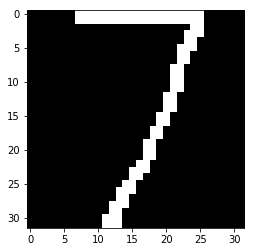

In [2]:
from torchvision import transforms
test_img = transforms.ToPILImage()(hasy_train.data[0])
plt.imshow(test_img, cmap='gray')
plt.show()

In [4]:
hasy_model = CharacterClassifier(hasy_train.img_dims, [50], hasy_train.no_labels)
hasy_model.train()

epochs = 15
optimizer = torch.optim.SGD(hasy_model.parameters(), lr=0.001, momentum=0.9)
criterion = nn.CrossEntropyLoss()

train_loader = DataLoader(hasy_train, batch_size=16, shuffle=True)
test_loader = DataLoader(hasy_test, batch_size=16, shuffle=False)
    
for epoch in range(epochs):
        print("Epoch {0}".format(epoch))
        for step, [x_train, y_train] in enumerate(tqdm(train_loader)):
            optimizer.zero_grad()
            train_pred = hasy_model(x_train)
            loss = criterion(train_pred, y_train)
            loss.backward()
            optimizer.step()
            if step % 100 == 0:
                print('Loss: {}'.format(loss))
torch.save(hasy_model.state_dict(), 'hasy_model.ckpt')        
           

accuracies = []
for idx, [x_test, y_test] in enumerate(tqdm(test_loader, desc='Test')):
    test_pred = hasy_model(x_test)
    accuracy = 100 * torch.mean((torch.argmax(test_pred, dim=1) == y_test).float())
    accuracies.append(accuracy)
print("Accuracy: {0}".format(np.mean(accuracies)))  

  0%|          | 0/194 [00:00<?, ?it/s]

Epoch 0


  1%|          | 1/194 [00:00<02:06,  1.53it/s]

Loss: 2.973334312438965


 52%|█████▏    | 101/194 [01:12<01:08,  1.36it/s]

Loss: 2.5223469734191895


  0%|          | 0/194 [00:00<?, ?it/s]

Epoch 1


  1%|          | 1/194 [00:00<02:37,  1.22it/s]

Loss: 2.6274502277374268


 52%|█████▏    | 101/194 [01:14<01:05,  1.43it/s]

Loss: 2.563889265060425


  0%|          | 0/194 [00:00<?, ?it/s]

Epoch 2


  1%|          | 1/194 [00:00<02:33,  1.26it/s]

Loss: 2.526527166366577


 52%|█████▏    | 101/194 [01:15<01:04,  1.43it/s]

Loss: 2.5091075897216797


  0%|          | 0/194 [00:00<?, ?it/s]

Epoch 3


  1%|          | 1/194 [00:00<02:20,  1.38it/s]

Loss: 2.631730079650879


 52%|█████▏    | 101/194 [01:13<01:06,  1.39it/s]

Loss: 2.2508654594421387


  0%|          | 0/194 [00:00<?, ?it/s]

Epoch 4


  1%|          | 1/194 [00:00<02:23,  1.34it/s]

Loss: 2.3112845420837402


 52%|█████▏    | 101/194 [01:09<00:58,  1.58it/s]

Loss: 2.3080224990844727


  0%|          | 0/194 [00:00<?, ?it/s]

Epoch 5


  1%|          | 1/194 [00:00<02:34,  1.25it/s]

Loss: 2.182392120361328


 52%|█████▏    | 101/194 [01:15<01:10,  1.31it/s]

Loss: 2.4924609661102295


  0%|          | 0/194 [00:00<?, ?it/s]

Epoch 6


  1%|          | 1/194 [00:00<02:38,  1.21it/s]

Loss: 2.1147470474243164


 52%|█████▏    | 101/194 [01:15<01:15,  1.23it/s]

Loss: 2.2519893646240234


  0%|          | 0/194 [00:00<?, ?it/s]

Epoch 7


  1%|          | 1/194 [00:01<03:49,  1.19s/it]

Loss: 2.0676968097686768


 52%|█████▏    | 101/194 [01:16<01:10,  1.31it/s]

Loss: 2.0649631023406982


  0%|          | 0/194 [00:00<?, ?it/s]

Epoch 8


  1%|          | 1/194 [00:00<02:09,  1.49it/s]

Loss: 2.1571438312530518


 52%|█████▏    | 101/194 [01:14<01:14,  1.25it/s]

Loss: 2.114755153656006


  0%|          | 0/194 [00:00<?, ?it/s]

Epoch 9


  1%|          | 1/194 [00:00<02:20,  1.37it/s]

Loss: 2.2931652069091797


 52%|█████▏    | 101/194 [01:04<00:57,  1.62it/s]

Loss: 2.390298366546631


  0%|          | 0/194 [00:00<?, ?it/s]

Epoch 10


  1%|          | 1/194 [00:00<01:58,  1.63it/s]

Loss: 2.3434653282165527


 52%|█████▏    | 101/194 [01:02<00:57,  1.61it/s]

Loss: 2.289788007736206


  0%|          | 0/194 [00:00<?, ?it/s]

Epoch 11


  1%|          | 1/194 [00:00<02:00,  1.60it/s]

Loss: 2.131429672241211


 52%|█████▏    | 101/194 [01:02<00:57,  1.61it/s]

Loss: 2.0353734493255615


  0%|          | 0/194 [00:00<?, ?it/s]

Epoch 12


  1%|          | 1/194 [00:00<02:02,  1.58it/s]

Loss: 2.1032581329345703


 52%|█████▏    | 101/194 [01:16<01:17,  1.20it/s]

Loss: 2.218057632446289


  0%|          | 0/194 [00:00<?, ?it/s]

Epoch 13


  1%|          | 1/194 [00:00<02:06,  1.53it/s]

Loss: 2.2183678150177


 52%|█████▏    | 101/194 [01:14<01:06,  1.40it/s]

Loss: 2.098310708999634


  0%|          | 0/194 [00:00<?, ?it/s]

Epoch 14


  1%|          | 1/194 [00:00<02:51,  1.13it/s]

Loss: 2.2184219360351562


 52%|█████▏    | 101/194 [01:14<01:08,  1.37it/s]

Loss: 2.1522092819213867


Test: 100%|██████████| 22/22 [00:03<00:00,  6.71it/s]

Accuracy: 85.51136016845703
